In [1]:
from sqlalchemy import create_engine
import pandas as pd
import datetime

# Use SQLAlchemy to create an engine for the MTA data from SQLite
engine = create_engine("sqlite:///mta_data.db")
df = pd.read_sql('select * from mta_data;', engine) # assign all the data in MTA data into dataframe (df)

### Cleaning
Cleaning up the dataframe.

In [2]:
df.info() # get information of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722610 entries, 0 to 2722609
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 228.5+ MB


In [3]:
df.head() # get top 5 result of the dataframe.

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


In [4]:
df.columns # To check for whitespace that can cause errors later on.

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [5]:
# convert date and time to date_time 
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME,format="%m/%d/%Y %H:%M:%S")

In [6]:
# Since no whitespace
# combine into one column identifiers for turnstiles 
df["turnstile"]=df["C/A"]+" "+df["UNIT"]+" "+df["SCP"]+" "+ df["STATION"]
df.head(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00,A002 R051 02-00-00 59 ST
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,20:00:00,REGULAR,7622861,2607817,2021-08-21 20:00:00,A002 R051 02-00-00 59 ST
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,00:00:00,REGULAR,7622923,2607848,2021-08-22 00:00:00,A002 R051 02-00-00 59 ST
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,04:00:00,REGULAR,7622927,2607851,2021-08-22 04:00:00,A002 R051 02-00-00 59 ST
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,08:00:00,REGULAR,7622936,2607860,2021-08-22 08:00:00,A002 R051 02-00-00 59 ST
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,12:00:00,REGULAR,7622963,2607888,2021-08-22 12:00:00,A002 R051 02-00-00 59 ST


Note: at index 42 there is a change in turnstile

In [7]:
# Combined column station to column lineneame to create a column linename_station 
df["Linename_station"]=df["STATION"]+ " " + df["LINENAME"]
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,turnstile,Linename_station
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689,2021-08-21 00:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697,2021-08-21 04:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718,2021-08-21 08:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766,2021-08-21 12:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802,2021-08-21 16:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W


In [8]:
# create a seperate dataframe for a turnstile
df_2 = df.sort_values(['turnstile', 'DATE', "ENTRIES", "Linename_station"]).reset_index()
df_2.head(25)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,turnstile,Linename_station
0,2513079,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,2021-05-29 00:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
1,2513080,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,2021-05-29 04:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
2,2513081,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2021-05-29 08:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
3,2513082,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,2021-05-29 12:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
4,2513083,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,2021-05-29 16:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
5,2513084,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,20:00:00,REGULAR,7579021,2590439,2021-05-29 20:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
6,2513085,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,00:00:00,REGULAR,7579078,2590451,2021-05-30 00:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
7,2513086,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,04:00:00,REGULAR,7579084,2590452,2021-05-30 04:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
8,2513087,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,08:00:00,REGULAR,7579085,2590454,2021-05-30 08:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W
9,2513088,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,12:00:00,REGULAR,7579093,2590493,2021-05-30 12:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W


In [9]:
# check for duplicates
(df_2.groupby(["turnstile","DATE_TIME", "Linename_station"]).ENTRIES.count().reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,turnstile,DATE_TIME,Linename_station,ENTRIES
2448636,R514 R094 00-05-00 ASTORIA BLVD,2021-07-22 04:00:00,ASTORIA BLVD NQW,2
1172385,N335 R158 01-00-03 KEW GARDENS,2021-06-20 18:30:00,KEW GARDENS EF,2
2457222,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-25 00:00:00,33 ST-RAWSON ST 7,2
2457223,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-25 04:00:00,33 ST-RAWSON ST 7,2
2457224,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-25 08:00:00,33 ST-RAWSON ST 7,2
2457225,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-25 12:00:00,33 ST-RAWSON ST 7,2
2457226,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-25 16:00:00,33 ST-RAWSON ST 7,2
2457227,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-25 20:00:00,33 ST-RAWSON ST 7,2
2457228,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-26 00:00:00,33 ST-RAWSON ST 7,2
2457230,R516 R291 00-00-02 33 ST-RAWSON ST,2021-08-26 08:00:00,33 ST-RAWSON ST 7,2


In [10]:
# Because there are duplicates
# Get rid of the duplicate entry

df_2.sort_values(["turnstile", "DATE_TIME", "Linename_station"], inplace=True, ascending=False)
df_2.drop_duplicates(subset=[ "turnstile", "DATE", "TIME", "Linename_station"], inplace=True)

In [11]:
# recheck for duplicates

(df_2.groupby(["Linename_station", "DATE_TIME", "turnstile"]).ENTRIES.count().reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,Linename_station,DATE_TIME,turnstile,ENTRIES
0,1 AV L,2021-05-29 00:00:00,H007 R248 00-00-00 1 AV,1
1815048,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R237B R047 01-00-02 GRD CNTRL-42 ST,1
1815050,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-00-00 GRD CNTRL-42 ST,1
1815051,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-00-01 GRD CNTRL-42 ST,1
1815052,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-00-02 GRD CNTRL-42 ST,1
1815053,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-00-03 GRD CNTRL-42 ST,1
1815054,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-03-00 GRD CNTRL-42 ST,1
1815055,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-03-01 GRD CNTRL-42 ST,1
1815056,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-03-02 GRD CNTRL-42 ST,1
1815057,GRD CNTRL-42 ST 4567S,2021-07-19 01:00:00,R240 R047 00-03-03 GRD CNTRL-42 ST,1


In [12]:
# create a dataframe of just daily turnstiles entries

df_2_daily = (df_2.groupby(["turnstile", "Linename_station", "DATE_TIME", "DATE", "TIME"],as_index=False).ENTRIES.first())
df_2_daily.head(35)

,turnstile,Linename_station,DATE_TIME,DATE,TIME,ENTRIES
0,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 00:00:00,05/29/2021,00:00:00,7578734
1,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 04:00:00,05/29/2021,04:00:00,7578740
2,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 08:00:00,05/29/2021,08:00:00,7578749
3,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 12:00:00,05/29/2021,12:00:00,7578789
4,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 16:00:00,05/29/2021,16:00:00,7578897
5,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 20:00:00,05/29/2021,20:00:00,7579021
6,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-30 00:00:00,05/30/2021,00:00:00,7579078
7,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-30 04:00:00,05/30/2021,04:00:00,7579084
8,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-30 08:00:00,05/30/2021,08:00:00,7579085
9,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-30 12:00:00,05/30/2021,12:00:00,7579093


In [13]:
# Get the difference from the previous entries
df_2_daily[["prev_DATE", "prev_entries"]]= df_2_daily.groupby(["turnstile", "Linename_station"])[["DATE","ENTRIES"]].shift(1)

In [14]:
df_2_daily.head() 

,turnstile,Linename_station,DATE_TIME,DATE,TIME,ENTRIES,prev_DATE,prev_entries
0,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 00:00:00,05/29/2021,00:00:00,7578734,NaN,NaN
1,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 04:00:00,05/29/2021,04:00:00,7578740,05/29/2021,7578734.0
2,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 08:00:00,05/29/2021,08:00:00,7578749,05/29/2021,7578740.0
3,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 12:00:00,05/29/2021,12:00:00,7578789,05/29/2021,7578749.0
4,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 16:00:00,05/29/2021,16:00:00,7578897,05/29/2021,7578789.0


In [15]:
# Check the last 5
df_2_daily.tail()

,turnstile,Linename_station,DATE_TIME,DATE,TIME,ENTRIES,prev_DATE,prev_entries
2722576,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,2021-08-27 05:00:00,08/27/2021,05:00:00,5554,08/27/2021,5554.0
2722577,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,2021-08-27 09:00:00,08/27/2021,09:00:00,5554,08/27/2021,5554.0
2722578,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,2021-08-27 13:00:00,08/27/2021,13:00:00,5554,08/27/2021,5554.0
2722579,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,2021-08-27 17:00:00,08/27/2021,17:00:00,5554,08/27/2021,5554.0
2722580,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,2021-08-27 21:00:00,08/27/2021,21:00:00,5554,08/27/2021,5554.0


In [16]:
#Check to see if i can combine .head().info()
df_2_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722581 entries, 0 to 2722580
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   turnstile         object        
 1   Linename_station  object        
 2   DATE_TIME         datetime64[ns]
 3   DATE              object        
 4   TIME              object        
 5   ENTRIES           int64         
 6   prev_DATE         object        
 7   prev_entries      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 166.2+ MB


In [17]:
(df_2_daily["ENTRIES"] - df_2_daily["prev_entries"]).describe()

count    2.717562e+06
mean    -1.015364e+03
std      1.190744e+06
min     -1.383110e+09
25%      3.000000e+00
50%      2.600000e+01
75%      8.200000e+01
max      6.684988e+08
dtype: float64

In [18]:
# Check how many rows, columns
df_2_daily[df_2_daily["ENTRIES"] < df_2_daily["prev_entries"]].shape

(23780, 8)

In [19]:
# Because the counter is working in the opposite direction, check how many turnstiles have having this problem.
(df_2_daily[df_2_daily["ENTRIES"] < df_2_daily["prev_entries"]].groupby(["turnstile", "Linename_station", "TIME"]).size())

turnstile                           Linename_station   TIME    
A011 R080 01-03-00 57 ST-7 AV       57 ST-7 AV NQRW    00:00:00    90
                                                       04:00:00    83
                                                       08:00:00    91
                                                       12:00:00    91
                                                       16:00:00    91
                                                                   ..
R730 R431 00-00-04 EASTCHSTER/DYRE  EASTCHSTER/DYRE 5  05:00:00    51
                                                       09:00:00    90
                                                       13:00:00    91
                                                       17:00:00    90
                                                       21:00:00    90
Length: 603, dtype: int64

In [20]:
# there could be any reason why it would reversed.
# could be that the counter didn't reset.
# To fix the reverse counter make a function.
def reverse_counter(row, maximum):
    counter = row["ENTRIES"] - row["prev_entries"]
    if counter < 0: # meaning it is a negative difference
        counter = -counter # this will reverse the counter
    if counter > maximum:
        counter = min(row["ENTRIES"], row["prev_entries"])
    if counter > maximum: #just incase the counter is still too big.
        return 0
    return counter

In [21]:
# create a new column calle proper entries with the correct counter amount.
df_2_daily["proper_entries"]=df_2_daily.apply(reverse_counter, axis = 1, maximum=100000)

In [22]:
df_2_daily.head()

,turnstile,Linename_station,DATE_TIME,DATE,TIME,ENTRIES,prev_DATE,prev_entries,proper_entries
0,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 00:00:00,05/29/2021,00:00:00,7578734,NaN,NaN,NaN
1,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 04:00:00,05/29/2021,04:00:00,7578740,05/29/2021,7578734.0,6.0
2,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 08:00:00,05/29/2021,08:00:00,7578749,05/29/2021,7578740.0,9.0
3,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 12:00:00,05/29/2021,12:00:00,7578789,05/29/2021,7578749.0,40.0
4,A002 R051 02-00-00 59 ST,59 ST NQR456W,2021-05-29 16:00:00,05/29/2021,16:00:00,7578897,05/29/2021,7578789.0,108.0


In [23]:
# used to get the statistics of the dalily traffic dataframe
df_2_daily.proper_entries.describe()

count    2.717562e+06
mean     6.277200e+01
std      3.447390e+02
min      0.000000e+00
25%      4.000000e+00
50%      2.700000e+01
75%      8.300000e+01
max      9.957700e+04
Name: proper_entries, dtype: float64

In [24]:
# to get the data the fall between the time of 4 pm and 10 pm
df_2_daily.set_index("DATE_TIME").between_time('16:00:00', '22:01:00').reset_index()

,DATE_TIME,turnstile,Linename_station,DATE,TIME,ENTRIES,prev_DATE,prev_entries,proper_entries
0,2021-05-29 16:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W,05/29/2021,16:00:00,7578897,05/29/2021,7578789.0,108.0
1,2021-05-29 20:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W,05/29/2021,20:00:00,7579021,05/29/2021,7578897.0,124.0
2,2021-05-30 16:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W,05/30/2021,16:00:00,7579165,05/30/2021,7579093.0,72.0
3,2021-05-30 20:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W,05/30/2021,20:00:00,7579275,05/30/2021,7579165.0,110.0
4,2021-05-31 16:00:00,A002 R051 02-00-00 59 ST,59 ST NQR456W,05/31/2021,16:00:00,7579463,05/31/2021,7579356.0,107.0
...,...,...,...,...,...,...,...,...,...
888507,2021-08-25 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,08/25/2021,21:00:00,5554,08/25/2021,5554.0,0.0
888508,2021-08-26 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,08/26/2021,17:00:00,5554,08/26/2021,5554.0,0.0
888509,2021-08-26 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,08/26/2021,21:00:00,5554,08/26/2021,5554.0,0.0
888510,2021-08-27 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT,RIT-ROOSEVELT R,08/27/2021,17:00:00,5554,08/27/2021,5554.0,0.0


In [25]:
df_station_daily_entries = df_2_daily.groupby([ "turnstile", "Linename_station","TIME", "DATE"])[["proper_entries"]].sum().reset_index().head(30)

In [26]:
df_station_daily_entries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnstile         30 non-null     object 
 1   Linename_station  30 non-null     object 
 2   TIME              30 non-null     object 
 3   DATE              30 non-null     object 
 4   proper_entries    30 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [27]:
# Grouped the columns Linename_station and time sorted by proper entries and stored them in a sub-dataframe

time_df_station_max_entries = df_2_daily.groupby(["Linename_station", "DATE_TIME", "TIME"]).sum().reset_index().sort_values("proper_entries", ascending=False)
time_df_station_max_entries.head(10)

,Linename_station,DATE_TIME,TIME,ENTRIES,prev_entries,proper_entries
353868,PATH NEW WTC 1,2021-08-19 13:30:29,13:30:29,37,9.961400e+04,99577.0
238287,JFK JAMAICA CT1 E,2021-08-27 21:00:00,21:00:00,2608960,2.700525e+06,92557.0
7458,116 ST BC,2021-07-18 13:00:00,13:00:00,195270371,1.953597e+08,89980.0
138769,CATHEDRAL PKWY 1,2021-06-08 17:00:00,17:00:00,6364157,6.450490e+06,89453.0
175120,EASTN PKWY-MUSM 23,2021-08-26 12:00:00,12:00:00,1143635410,1.143718e+09,83046.0
343305,PATH NEW WTC 1,2021-07-09 11:28:39,11:28:39,49,8.279200e+04,82743.0
241839,JOURNAL SQUARE 1,2021-06-18 07:28:32,07:28:32,0,7.700500e+04,77005.0
238698,JKSN HT-ROOSVLT EFMR7,2021-08-01 20:00:00,20:00:00,126584067,1.266555e+08,76962.0
77393,66 ST-LINCOLN 1,2021-08-21 13:00:00,13:00:00,170734115,1.708087e+08,75706.0
229571,HOWARD BCH JFK A,2021-06-05 01:00:00,01:00:00,1031566,1.104195e+06,73063.0


In [28]:
# Now for the graphing part!
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'png' # save images in png format
%matplotlib inline 
# render graphs in Jupyter Notebook

In [29]:
# Verify type. 
type(time_df_station_max_entries)

pandas.core.frame.DataFrame

In [30]:
# the the total amount of people entering into the station and group by station to see the which has the highest.
total_df_station_max_entries = df_2_daily.groupby('Linename_station')['proper_entries'].sum().reset_index().sort_values('proper_entries', ascending=False)
total_df_station_max_entries.head(8)

,Linename_station,proper_entries
89,34 ST-HERALD SQ BDFMNQRW,3071679.0
312,GRD CNTRL-42 ST 4567S,2879266.0
340,JOURNAL SQUARE 1,2716138.0
102,42 ST-PORT AUTH ACENQRS1237W,2427611.0
404,PATH NEW WTC 1,2160503.0
289,FLUSHING-MAIN 7,2099558.0
93,34 ST-PENN STA ACE,2068924.0
339,JKSN HT-ROOSVLT EFMR7,1983298.0


In [31]:
# Get the top 5 stations with the highest amount of entries.
top_5_station_max_entries = total_df_station_max_entries[:5]
print (top_5_station_max_entries)

                 Linename_station  proper_entries
89       34 ST-HERALD SQ BDFMNQRW       3071679.0
312         GRD CNTRL-42 ST 4567S       2879266.0
340              JOURNAL SQUARE 1       2716138.0
102  42 ST-PORT AUTH ACENQRS1237W       2427611.0
404                PATH NEW WTC 1       2160503.0


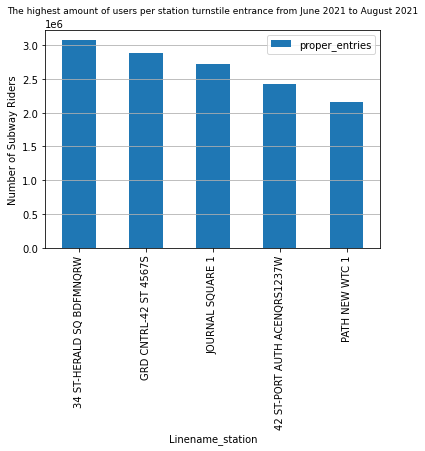

In [32]:
# Graph the top 5 stations with based on the highest turnstile counter.

top_5_station_max_entries.plot.bar(x="Linename_station", y="proper_entries")
plt.grid(axis = 'y')
# plt.xlim([df_station_max[0], df_station_max[6]])
plt.ylabel("Number of Subway Riders")

plt.title("The highest amount of users per station turnstile entrance from June 2021 to August 2021", fontsize=9, y=1.05);
plt.savefig('Most Used Station by number of passengers entered_V2.png', dpi=100, facecolor='w', bbox_inches ="tight")

In [33]:
# using mask to make a filter for selecting a specific turnstile and time?
# for times use the day and take the difference of entries.
_34_ST_HERALD_SQ_BDFMNQRW=(time_df_station_max_entries["Linename_station"]=="34 ST-HERALD SQ BDFMNQRW")
GRD_CNTRL_42_ST_4567S=(time_df_station_max_entries["Linename_station"]=="GRD CNTRL-42 ST 4567S")
JOURNAL_SQUARE_1=(time_df_station_max_entries["Linename_station"]=="JOURNAL SQUARE 1")
_42_ST_PORT_AUTH_ACENQRS1237W=(time_df_station_max_entries["Linename_station"]=="42 ST-PORT AUTH ACENQRS1237W")
PATH_NEW_WTC_1=(time_df_station_max_entries["Linename_station"]=="PATH NEW WTC 1")

In [34]:
# sort time
PATH_NEW_WTC_1=time_df_station_max_entries[PATH_NEW_WTC_1].sort_values("TIME")

In [35]:
PATH_NEW_WTC_1.set_index("DATE_TIME").between_time('16:00:00', '22:00:00').reset_index().head()

,DATE_TIME,Linename_station,TIME,ENTRIES,prev_entries,proper_entries
0,2021-08-07 16:00:10,PATH NEW WTC 1,16:00:10,55909,55827.0,82.0
1,2021-07-05 16:00:14,PATH NEW WTC 1,16:00:14,6673,6658.0,15.0
2,2021-08-24 16:00:21,PATH NEW WTC 1,16:00:21,24289,24206.0,83.0
3,2021-08-18 16:00:22,PATH NEW WTC 1,16:00:22,1280,1278.0,2.0
4,2021-07-27 16:00:23,PATH NEW WTC 1,16:00:23,52928,52791.0,137.0


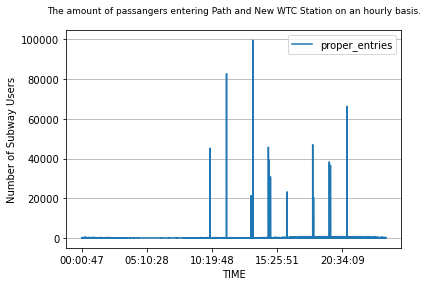

In [36]:
# Graph for Path New WTC
PATH_NEW_WTC_1.plot(x="TIME", y="proper_entries")

plt.grid(axis = 'y')
plt.ylabel("Number of Subway Users")
#plt.xticks(16:00:00, 20:00:00)
plt.title("The amount of passangers entering Path and New WTC Station on an hourly basis.", fontsize=9, y=1.05);
plt.savefig('The amount of passangers entering Station Path and New WTC on an hourly basis.png', dpi=100, facecolor='w')

In [37]:
_34_ST_HERALD_SQ_BDFMNQRW=time_df_station_max_entries[_34_ST_HERALD_SQ_BDFMNQRW].sort_values("TIME")

In [38]:
_34_ST_HERALD_SQ_BDFMNQRW=_34_ST_HERALD_SQ_BDFMNQRW.set_index("DATE_TIME").between_time('16:00:00', '22:01:00').reset_index()

In [39]:
# snapshot of station bottome 5 results
_34_ST_HERALD_SQ_BDFMNQRW.tail()

,DATE_TIME,Linename_station,TIME,ENTRIES,prev_entries,proper_entries
177,2021-06-29 20:00:00,34 ST-HERALD SQ BDFMNQRW,20:00:00,3172921531,3.172907e+09,15650.0
178,2021-06-18 20:00:00,34 ST-HERALD SQ BDFMNQRW,20:00:00,3173034794,3.173020e+09,15666.0
179,2021-08-25 20:00:00,34 ST-HERALD SQ BDFMNQRW,20:00:00,3175167515,3.175153e+09,15679.0
180,2021-06-03 20:00:00,34 ST-HERALD SQ BDFMNQRW,20:00:00,3172555841,3.172542e+09,14786.0
181,2021-07-20 20:00:00,34 ST-HERALD SQ BDFMNQRW,20:00:00,3174038014,3.174022e+09,16900.0


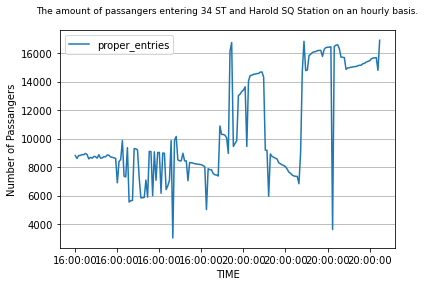

In [40]:
# Plot for 34 and Harold Sq
_34_ST_HERALD_SQ_BDFMNQRW.plot(x="TIME", y="proper_entries")
plt.grid(axis = 'y')
plt.ylabel("Number of Passangers")
plt.title("The amount of passangers entering 34 ST and Harold SQ Station on an hourly basis.", fontsize=9, y=1.05);
plt.savefig('The amount of passangers entering 34 ST and Harold SQ Station on an hourly basis.png', dpi=100, facecolor='w')

In [41]:
GRD_CNTRL_42_ST_4567S=(time_df_station_max_entries["Linename_station"]=="GRD CNTRL-42 ST 4567S")

In [42]:
GRD_CNTRL_42_ST_4567S=time_df_station_max_entries[GRD_CNTRL_42_ST_4567S].sort_values("TIME")

In [43]:
GRD_CNTRL_42_ST_4567S=GRD_CNTRL_42_ST_4567S.set_index("DATE_TIME").between_time('16:00:00', '22:01:00').reset_index()

In [44]:
# snapshot of station
GRD_CNTRL_42_ST_4567S.head(6)

,DATE_TIME,Linename_station,TIME,ENTRIES,prev_entries,proper_entries
0,2021-07-01 16:00:00,GRD CNTRL-42 ST 4567S,16:00:00,1367528587,1.367524e+09,4360.0
1,2021-08-26 16:00:00,GRD CNTRL-42 ST 4567S,16:00:00,1368504791,1.368500e+09,4964.0
2,2021-07-27 16:00:00,GRD CNTRL-42 ST 4567S,16:00:00,1367981255,1.367977e+09,4637.0
3,2021-06-24 16:00:00,GRD CNTRL-42 ST 4567S,16:00:00,1367405066,1.367401e+09,4519.0
4,2021-06-29 16:00:00,GRD CNTRL-42 ST 4567S,16:00:00,1367489799,1.367486e+09,4372.0
5,2021-07-02 16:00:00,GRD CNTRL-42 ST 4567S,16:00:00,1367547197,1.367542e+09,4941.0


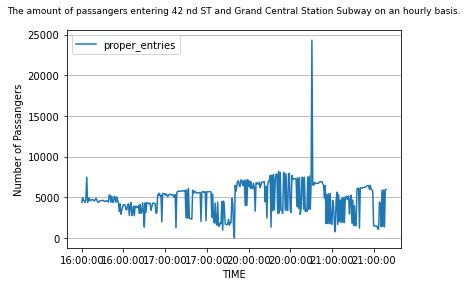

In [45]:
# Graph for 42nd and Grand Central Station
GRD_CNTRL_42_ST_4567S.plot(x="TIME", y="proper_entries")
plt.grid(axis = 'y')
plt.ylabel("Number of Passangers")
plt.title("The amount of passangers entering 42 nd ST and Grand Central Station Subway on an hourly basis.", fontsize=9, y=1.05);
plt.savefig('The amount of passangers entering 42 nd ST and Grand Central Station Subway on an hourly basis.png', dpi=100, facecolor='w')

In [46]:
JOURNAL_SQUARE_1=(time_df_station_max_entries["Linename_station"]=="JOURNAL SQUARE 1")

In [47]:
JOURNAL_SQUARE_1=time_df_station_max_entries[JOURNAL_SQUARE_1].sort_values("TIME")

In [48]:
JOURNAL_SQUARE_1.set_index("DATE_TIME").between_time('16:00:00', '22:01:00').reset_index().head()

,DATE_TIME,Linename_station,TIME,ENTRIES,prev_entries,proper_entries
0,2021-05-29 16:00:15,JOURNAL SQUARE 1,16:00:15,226152,226069.0,83.0
1,2021-08-03 16:00:16,JOURNAL SQUARE 1,16:00:16,114464,114431.0,33.0
2,2021-07-27 16:00:16,JOURNAL SQUARE 1,16:00:16,113153,113122.0,31.0
3,2021-08-10 16:00:16,JOURNAL SQUARE 1,16:00:16,115544,115514.0,30.0
4,2021-07-22 16:00:20,JOURNAL SQUARE 1,16:00:20,139378,139378.0,0.0


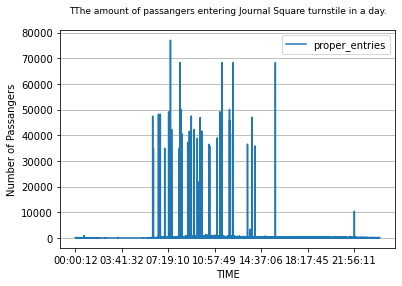

In [49]:
# Graph of Journal Sq turnstile entrance
JOURNAL_SQUARE_1.plot(x="TIME", y="proper_entries")
plt.grid(axis = 'y')
plt.ylabel("Number of Passangers")
plt.title("TThe amount of passangers entering Journal Square turnstile in a day.", fontsize=9, y=1.05);
plt.savefig('The amount of passangers entering Journal Square turnstile in a day.png', dpi=100, facecolor='w')

In [50]:
_42_ST_PORT_AUTH_ACENQRS1237W=(time_df_station_max_entries["Linename_station"]=="42 ST-PORT AUTH ACENQRS1237W")

In [51]:
_42_ST_PORT_AUTH_ACENQRS1237W=time_df_station_max_entries[_42_ST_PORT_AUTH_ACENQRS1237W].sort_values("TIME")

In [52]:
_42_ST_PORT_AUTH_ACENQRS1237W.set_index("DATE_TIME").between_time('16:00:00', '22:01:00').reset_index().head()

,DATE_TIME,Linename_station,TIME,ENTRIES,prev_entries,proper_entries
0,2021-08-03 16:00:00,42 ST-PORT AUTH ACENQRS1237W,16:00:00,7265919355,7.265917e+09,3228.0
1,2021-07-01 16:00:00,42 ST-PORT AUTH ACENQRS1237W,16:00:00,7265455672,7.265453e+09,3266.0
2,2021-07-29 16:00:00,42 ST-PORT AUTH ACENQRS1237W,16:00:00,7265850605,7.265848e+09,3200.0
3,2021-06-14 16:00:00,42 ST-PORT AUTH ACENQRS1237W,16:00:00,7266816657,7.266814e+09,3194.0
4,2021-07-12 16:00:00,42 ST-PORT AUTH ACENQRS1237W,16:00:00,7265599600,7.265597e+09,3280.0


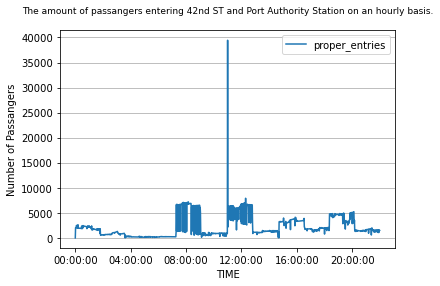

In [53]:
# Graph of 42nd and Port Authority
_42_ST_PORT_AUTH_ACENQRS1237W.plot(x="TIME", y="proper_entries")
plt.grid(axis = 'y')
plt.ylabel("Number of Passangers")
plt.title("The amount of passangers entering 42nd ST and Port Authority Station on an hourly basis.", fontsize=9, y=1.05);
plt.savefig('The amount of passangers entering 42nd ST and Port Authority Station on an hourly basis.png', dpi=100, facecolor='w')